<a href="https://colab.research.google.com/github/Neoneto/CodingDojo_Week11/blob/main/Belt_Exam_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Belt Exam 3
Option B: Student Success \
Submitted by Kenneth Alaba

# Part 1
Clustering Using KMeans

# Loading the Data

In [250]:
# Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
df0 = pd.read_csv('/content/drive/My Drive/Coding Dojo/Belt Exam 3/Option_B_clustering - Option_B_clustering.csv')
df0.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,1,2,9,2,0,240,0,1,78,85,80,85,82
1,0,2,2,1,0,60,0,1,70,68,70,64,60
2,0,3,5,1,0,60,0,1,72,71,74,88,75
3,0,1,5,0,0,60,0,1,69,30,63,35,75
4,1,2,3,0,0,60,0,1,70,65,62,75,68


In [4]:
# Check the df info
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   gender                12737 non-null  int64
 1   highest_education     12737 non-null  int64
 2   imd_band              12737 non-null  int64
 3   age_band              12737 non-null  int64
 4   num_of_prev_attempts  12737 non-null  int64
 5   studied_credits       12737 non-null  int64
 6   disability            12737 non-null  int64
 7   passed_course         12737 non-null  int64
 8   assess_score_1        12737 non-null  int64
 9   assess_score_2        12737 non-null  int64
 10  assess_score_3        12737 non-null  int64
 11  assess_score_4        12737 non-null  int64
 12  assess_score_5        12737 non-null  int64
dtypes: int64(13)
memory usage: 1.3 MB


In [5]:
# Check for missing values

df0.isnull().sum()

gender                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
passed_course           0
assess_score_1          0
assess_score_2          0
assess_score_3          0
assess_score_4          0
assess_score_5          0
dtype: int64

There are no missing values and since all the columns are numerical, we don't need to check for inconsistencies in categorical values.

# Exploratory Data Analysis

In [6]:
# Copy the dataframe
cluster_df = df0.copy()

## Histogram of all columns
By creating a histogram, we can check the distribution of the column and also check for outliers or extreme/unusual values.

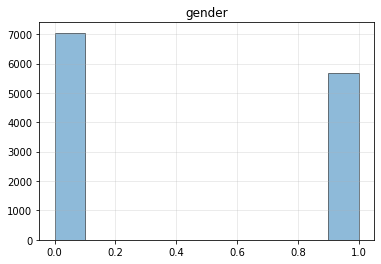

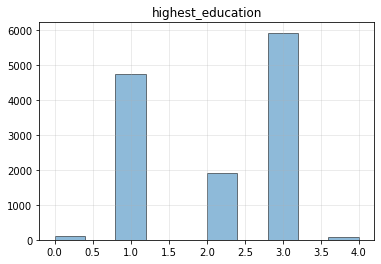

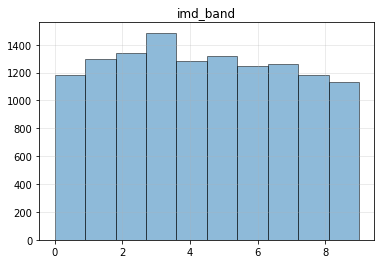

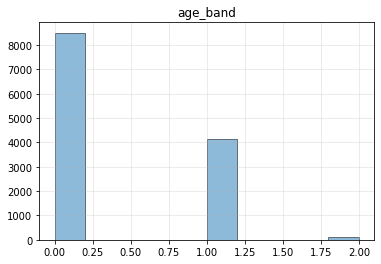

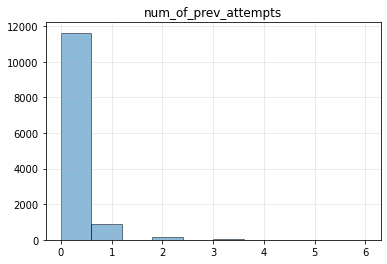

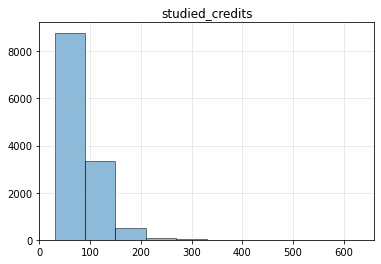

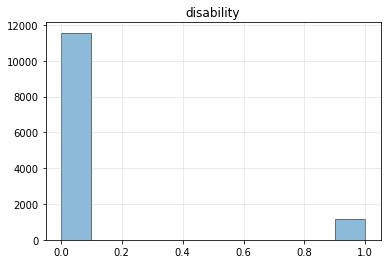

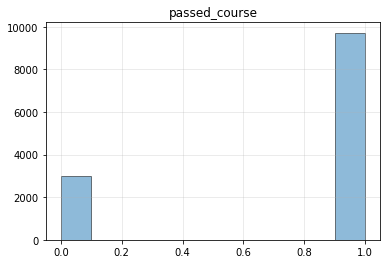

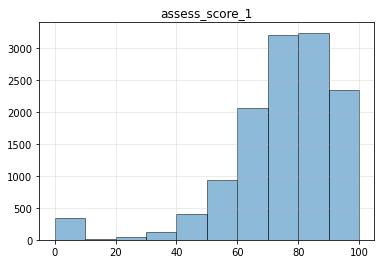

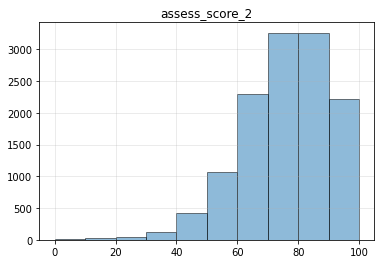

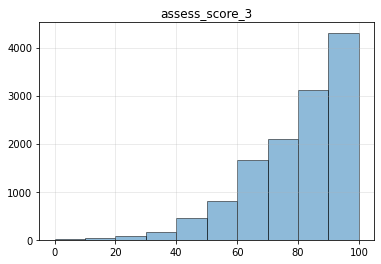

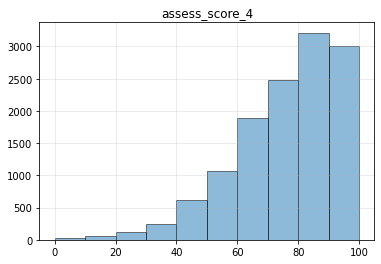

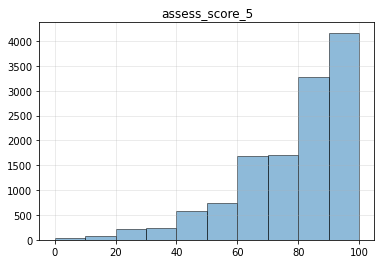

In [7]:


#fig, ax = plt.subplots(len(cluster_df.columns))



# Create a subplot for each column
n_plots = np.arange(len(cluster_df.columns))

# print(n_plots)

for n in n_plots:
  plt.figure(n)
  plt.hist(cluster_df[cluster_df.columns[n]], edgecolor = 'k', alpha = 0.5)
  plt.title(cluster_df.columns[n])
  plt.grid(alpha = 0.3)

For all the columns, we can clearly see the distributions which means that there are no possible outliers. 

## PCA
Reduce the dimensions to two and visualize the data.

In [8]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
cluster_scaled_df = scaler.fit_transform(cluster_df)

In [9]:
# Import PCA
from sklearn.decomposition import PCA

# Instantiate & fit data using PCA
pca = PCA(n_components= 2)


# fit PCA
X_pca = pca.fit_transform(cluster_scaled_df)
X_pca = pca.transform(cluster_scaled_df)

Text(0, 0.5, 'Principal Component 2')

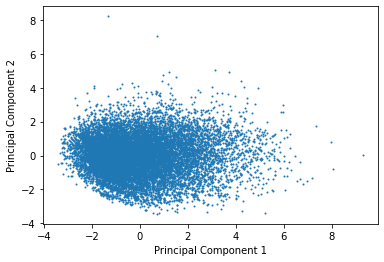

In [10]:
# Visualize the components using scatterplot
plt.scatter(X_pca[:,0], X_pca[:,1], s = 1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

From the plot, we can only see a big single cluster of the data points with a bit of noise. This is not enough to help to determine what clustering model to use.
Since there is just a single obvious cluster, becaus k_means depends clustering on the distance between data points, the model might have difficulty and it is possible that the data might be clustered with just a single linear spearation in the middle.

## More Visualizations using the raw columns.

### Heat map
Create a heatmap to visualize which columns have strong correlations.

[Text(0.5, 1.0, 'Columns with Correlation Coefficient of above 0.2')]

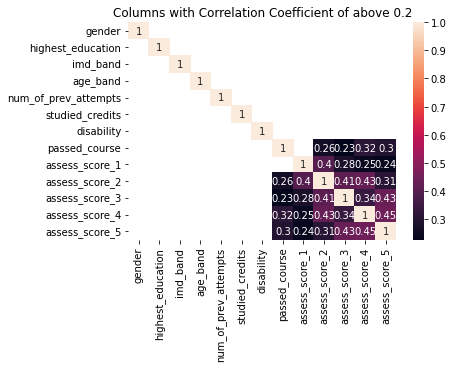

In [11]:
# Calculate teh correlation
corr = cluster_df.corr()

# Plot a heatmap
sns.heatmap(corr, annot = True, mask = (abs(corr) < 0.2)).set(title = 'Columns with Correlation Coefficient of above 0.2')

#sns.title('Columns with Correlation Coefficient of above 0.2')


We can see that there are no columns with strong correlation but the assess scores 4 and 5 have the strongest correlation compared to other columns, although only of moderate strength. 

### Plot assess_score_4 and assess_score_5

In [12]:
#create a te,porary df as the mean of the 4 assess scores
temp_df = pd.DataFrame()
temp_df['mean_assess_score'] = cluster_df[['assess_score_1', 'assess_score_2', 'assess_score_3', 'assess_score_4', 'assess_score_5']].mean(axis = 1)


Text(0, 0.5, 'passed_course')

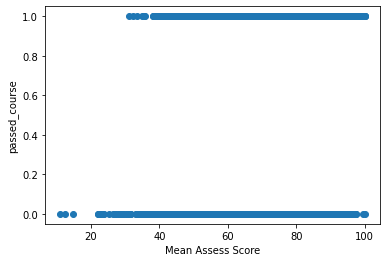

In [13]:
# Create a scatterplot
plt.scatter(temp_df, cluster_df.passed_course)
plt.xlabel('Mean Assess Score')
plt.ylabel('passed_course')

We can see that the students who pass the course and not are bot widely spread at different mean scores.

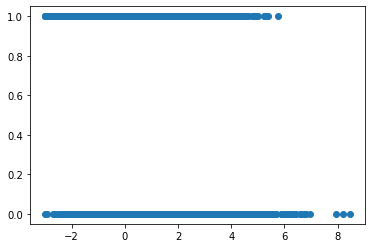

In [14]:
# reduce the assess scores to 1 principal component.

# Fit & transform data.
partial_cluster_scaled_df = scaler.fit_transform(cluster_df[['assess_score_1', 'assess_score_2', 'assess_score_3', 'assess_score_4', 'assess_score_5']]) 

# Instantiate & fit data using PCA
partial_pca = PCA(n_components= 1)

# fit PCA
X_partial_pca = partial_pca.fit_transform(partial_cluster_scaled_df)
X_partial_pca = partial_pca.transform(partial_cluster_scaled_df)

plt.scatter(X_partial_pca, cluster_df.passed_course)

Similar with the mean scores, we can't see a distinct separation between the data points even when the dimension of the scores are reduced.

# Clustering

In [16]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_cluster_df = scaler.fit_transform(cluster_df)

In [17]:
#Create an empty list of inertias and silhouette_scores
inertias = []
silhouette_scores = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):  
  kmeans = KMeans(n_clusters=k, random_state=0)  
  kmeans.fit(scaled_cluster_df)  
  inertias.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(scaled_cluster_df, kmeans.labels_))



In [18]:
kmeans.get_params

<bound method BaseEstimator.get_params of KMeans(n_clusters=10, random_state=0)>

Text(0.5, 1.0, 'Inertias vs Clusters')

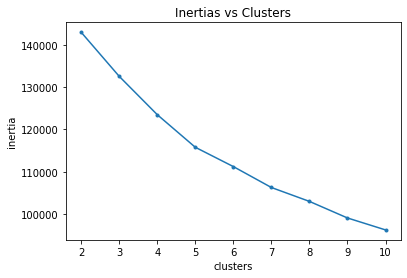

In [19]:
#Visualize inertia scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')
plt.title('Inertias vs Clusters')

Text(0.5, 1.0, 'Silhouette Scores vs Clusters')

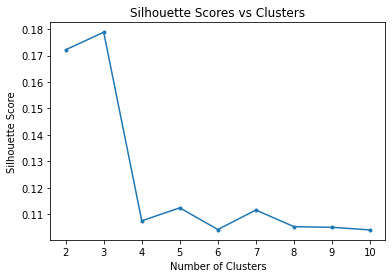

In [20]:
# Visualize silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores vs Clusters')

From the plot of Inertias, there is no obvious elbow since the inertia scores decrease gradually at almost the same rate. The best candidate for an 'elbow' is around n=5 cluster however its rate of change and its the rate of change of the rate of change (second derivate) doesn't differ significantly from the other clusters.\
From the silhouette scores, the best candicate is n=3 clusters since it has the highest scores compared to others. (However this is still not the best since it has only a score of around 0.18 which is far from 1, which is the ideal score.

# Creates 3 Clusters

In [22]:
# creates 3 clusters
ideal_kmeans = KMeans(n_clusters=3,  random_state=0)  
ideal_kmeans.fit(scaled_cluster_df)  

# Store the predicted clusters
cluster_df['cluster'] = ideal_kmeans.labels_

# Explanatory Data Visualization

In [104]:
# Create a new column as the arithmetic mean of the 5 assess scores of the students
cluster_df['mean_assess_score'] = cluster_df[['assess_score_1', 'assess_score_2', 'assess_score_3', 'assess_score_4', 'assess_score_5', ]].mean(axis = 1)

# Add the two principal components of the original columns
cluster_df['pc1'] = X_pca[:,0]
cluster_df['pc2'] = X_pca[:,1]

cluster_df.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5,cluster,mean_assess_score,pc1,pc2
0,1,2,9,2,0,240,0,1,78,85,80,85,82,1,82.0,-1.080274,2.294478
1,0,2,2,1,0,60,0,1,70,68,70,64,60,2,66.4,0.925016,-1.196087
2,0,3,5,1,0,60,0,1,72,71,74,88,75,1,76.0,-0.440948,-1.015174
3,0,1,5,0,0,60,0,1,69,30,63,35,75,2,54.4,2.767566,-1.421016
4,1,2,3,0,0,60,0,1,70,65,62,75,68,2,68.0,0.895504,0.039423


In [105]:
# Create separate dataframes based on cluster
cluster_0 = cluster_df.loc[cluster_df.cluster == 0].drop(columns = 'cluster')
cluster_1 = cluster_df.loc[cluster_df.cluster == 1].drop(columns = 'cluster')
cluster_2 = cluster_df.loc[cluster_df.cluster == 2].drop(columns = 'cluster')


Text(0.5, 1.0, 'Student Segmentation')

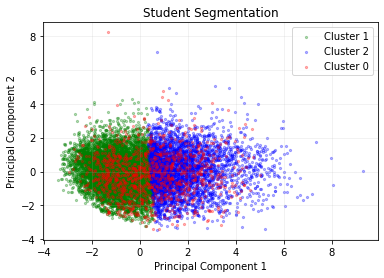

In [115]:
# Create a scatterplot of the clusters against the principal components
plt.scatter(cluster_1.pc1, cluster_1.pc2, c = 'g' , label = 'Cluster 1', s = 5, alpha = 0.3)
plt.scatter(cluster_2.pc1, cluster_2.pc2, c = 'b' , label = 'Cluster 2', s = 5, alpha = 0.3)
plt.scatter(cluster_0.pc1, cluster_0.pc2, c = 'r' , label = 'Cluster 0', s = 5, alpha = 0.3)
plt.legend()
plt.grid(alpha = 0.2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Student Segmentation')


From the plot of the pricipal components and the clusters, ther eis no obvious distinction between the created student segments which might suggest that it is not a good idea to create student segments based on the presented data. It is also possible that the Kmeans clustering is not the best model for this dataset.

Text(0.5, 1.0, 'Student Segmentation')

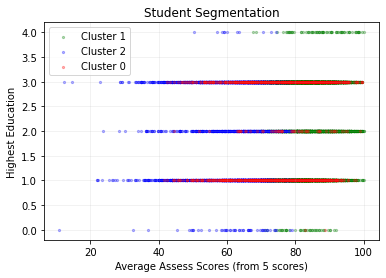

In [121]:
# Create a scatterplot of the clusters against the principal components
plt.scatter(cluster_1.mean_assess_score, cluster_1.highest_education, c = 'g' , label = 'Cluster 1', s = 5, alpha = 0.3)
plt.scatter(cluster_2.mean_assess_score, cluster_2.highest_education, c = 'b' , label = 'Cluster 2', s = 5, alpha = 0.3)
plt.scatter(cluster_0.mean_assess_score, cluster_0.highest_education, c = 'r' , label = 'Cluster 0', s = 5, alpha = 0.3)
plt.legend()
plt.grid(alpha = 0.2)
plt.xlabel('Average Assess Scores (from 5 scores)')
plt.ylabel('Highest Education')
plt.title('Student Segmentation')


Text(0.5, 1.0, 'Student Segmentation')

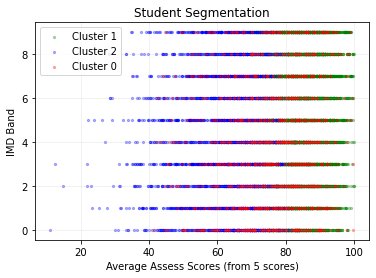

In [122]:
# Create a scatterplot
plt.scatter(cluster_1.mean_assess_score, cluster_1.imd_band, c = 'g' , label = 'Cluster 1', s = 5, alpha = 0.3)
plt.scatter(cluster_2.mean_assess_score, cluster_2.imd_band, c = 'b' , label = 'Cluster 2', s = 5, alpha = 0.3)
plt.scatter(cluster_0.mean_assess_score, cluster_0.imd_band, c = 'r' , label = 'Cluster 0', s = 5, alpha = 0.3)
plt.legend()
plt.grid(alpha = 0.2)
plt.xlabel('Average Assess Scores (from 5 scores)')
plt.ylabel('IMD Band')
plt.title('Student Segmentation')

Even from factors which you would expect to have an impact to student segmentation in an online environment such as Highest Education, IMD Band, and the average of their Assess Scores, there is no obvious distinction between the clusters.

Text(0.5, 1.0, 'Student Segmentation')

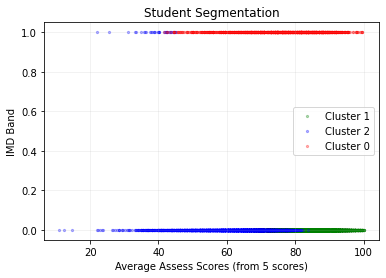

In [123]:
# Create a scatterplot
plt.scatter(cluster_1.mean_assess_score, cluster_1.disability, c = 'g' , label = 'Cluster 1', s = 5, alpha = 0.3)
plt.scatter(cluster_2.mean_assess_score, cluster_2.disability, c = 'b' , label = 'Cluster 2', s = 5, alpha = 0.3)
plt.scatter(cluster_0.mean_assess_score, cluster_0.disability, c = 'r' , label = 'Cluster 0', s = 5, alpha = 0.3)
plt.legend()
plt.grid(alpha = 0.2)
plt.xlabel('Average Assess Scores (from 5 scores)')
plt.ylabel('IMD Band')
plt.title('Student Segmentation')

If this segmentation were to followed, one of the obvious distinction is based on whether the student has a disability and on their average assess scores. We can see that cluster 0 is only composed of people with disability (1) and have high average assess scores while cluster 1 is composed only of people without disability and also have high scores. Cluster two on the other hand is a mix of students with and without disability but majority has no disability. Regardless of their disability, this cluster is composed of students with lower scores. \
By followng this segmentation, it is possible to face ethical issues like discrimination against people with disability.

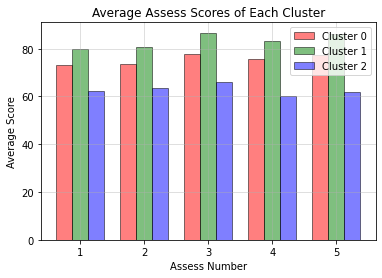

In [143]:
assess = ['assess_score_1', 'assess_score_2', 'assess_score_3', 'assess_score_4', 'assess_score_5', ]

N = 5#len(assess) + 1
ind = np.arange(N) + 1
width = 0.25
  
c0_vals = cluster_0[assess].mean()[:N]
bar0 = plt.bar(ind, c0_vals, width, color = 'r', alpha = 0.5, edgecolor = 'k')

c1_vals = cluster_1[assess].mean()[:N]
bar1 = plt.bar(ind + width, c1_vals, width, color = 'g', alpha = 0.5, edgecolor = 'k')
  
c2_vals = cluster_2[assess].mean()[:N]
bar2 = plt.bar(ind + width*2, c2_vals, width, color = 'b', alpha = 0.5, edgecolor = 'k')
  
plt.xlabel('Assess Number')
plt.ylabel('Average Score')
plt.title('Average Assess Scores of Each Cluster')

plt.grid(alpha = 0.2) 
plt.xticks(ind+width,ind)
plt.legend( (bar0, bar1, bar2), ('Cluster 0', 'Cluster 1', 'Cluster 2') )
plt.show()

From this plot, we can see that the average scores for all Assessments of Cluster 1 is the highest followed by Cluster 0 and then Cluster 2. 

Text(0.5, 1.0, 'Score Distribution of the Clusters')

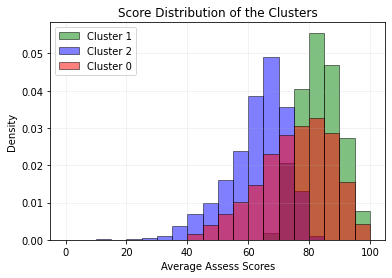

In [160]:
# Histograms of 
bins = np.arange(0,105,5) 

plt.hist(cluster_1.mean_assess_score, density = True, alpha = 0.5, edgecolor = 'k', bins = bins, color = 'g', label = 'Cluster 1')
plt.hist(cluster_2.mean_assess_score, density = True, alpha = 0.5, edgecolor = 'k', bins = bins, color = 'b', label = 'Cluster 2')
plt.hist(cluster_0.mean_assess_score, density = True, alpha = 0.5, edgecolor = 'k', bins = bins, color = 'r', label = 'Cluster 0')

plt.legend()

plt.grid(alpha = 0.2)
plt.xlabel('Average Assess Scores')
plt.ylabel('Density')
plt.title('Score Distribution of the Clusters')

# Part 2
Modeling

# Loading the new data.

In [161]:
# Load the new dataset
df1 = pd.read_csv('/content/drive/My Drive/Coding Dojo/Belt Exam 3/Option_B_modeling.csv')
df1.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5,assess_submitted_1,assess_submitted_2,assess_submitted_3,assess_submitted_4,assess_submitted_5,assess_submitted_6,assess_score_6,assess_submitted_7,assess_score_7,assess_submitted_8,assess_score_8,assess_submitted_9,assess_score_9,assess_submitted_10,assess_score_10,assess_submitted_11,assess_score_11,assess_submitted_12,assess_score_12,assess_submitted_13,assess_score_13,assess_submitted_14,assess_score_14,sum_activities_-25,sum_click_-25,activities_x_clicks_-25,sum_activities_-24,...,sum_activities_260,sum_click_260,activities_x_clicks_260,sum_activities_261,sum_click_261,activities_x_clicks_261,sum_activities_262,sum_click_262,activities_x_clicks_262,sum_activities_263,sum_click_263,activities_x_clicks_263,sum_activities_264,sum_click_264,activities_x_clicks_264,sum_activities_265,sum_click_265,activities_x_clicks_265,sum_activities_266,sum_click_266,activities_x_clicks_266,sum_activities_267,sum_click_267,activities_x_clicks_267,sum_activities_268,sum_click_268,activities_x_clicks_268,module_0,module_AAA,module_BBB,module_CCC,module_DDD,module_EEE,module_FFF,module_GGG,presentation_0,presentation_2013B,presentation_2013J,presentation_2014B,presentation_2014J
0,1,2,9,2,0,240,0,1,78.0,85.0,80.0,85.0,82.0,-1.0,-1.0,-2.0,-2.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,2,2,1,0,60,0,1,70.0,68.0,70.0,64.0,60.0,3.0,-2.0,4.0,-2.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,3,5,1,0,60,0,1,72.0,71.0,74.0,88.0,75.0,-2.0,-3.0,-2.0,-1.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,1,5,0,0,60,0,1,69.0,30.0,63.0,35.0,75.0,7.0,21.0,7.0,15.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,1,2,3,0,0,60,0,1,70.0,65.0,62.0,75.0,68.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0


This dataset is said to be cleaned already so we can skip that part.

In [162]:
# Copy the dataframe
model_df = df1.copy()

In [165]:
# Split into features and target
X = model_df.drop(columns = 'passed_course')
y = model_df['passed_course']

In [166]:
# check the distribution of the target
y.value_counts(normalize = True)

1    0.763131
0    0.236869
Name: passed_course, dtype: float64

The dataset is unbalanced and it is important to stratify in splitting.

# Train Test Split

In [173]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

Splitting is done first before any transformations to avoid data leakage.

# PCA

In [174]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

In [175]:
# Instantiate & fit data using PCA with default parameters
pca = PCA()

# Fit and transform train set
pca.fit(X_train_sc)
X_train_pc = pca.transform(X_train_sc)

# Fit and transform test set
pca.fit(X_test_sc)
X_test_pc = pca.transform(X_test_sc)

In [183]:
temp_df = pd.DataFrame(X_test_pc)
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929
0,-4.509208,-0.993167,0.677302,1.353967,0.334320,-0.836729,-1.320192,-0.247110,-0.246880,-2.019051,0.099296,0.200951,0.539011,-0.090144,-0.633084,-0.497640,0.230438,-0.265542,-2.088947,0.258931,-0.447431,0.338633,-0.329994,-0.052400,-1.542601,-1.283568,-0.268443,0.949998,-0.139819,-0.470523,-0.888043,-0.778402,0.019588,0.911601,-0.785847,-0.124735,-0.722314,0.933767,0.034324,-1.107677,...,0.154031,0.026691,0.244995,0.027084,0.057909,-0.077825,0.091175,0.094332,0.032950,-0.009593,-0.006842,0.012646,-0.089390,0.052266,0.096201,0.008480,0.040790,-0.208331,-0.125649,-0.019327,-0.167319,-0.125870,0.167649,0.023494,-0.000631,0.107856,-0.186136,-0.146013,0.083353,0.017999,-0.044927,-0.021275,-0.070145,-0.117649,0.011588,-0.001655,-3.719281e-16,-1.155957e-14,-3.647302e-17,-7.511493e-16
1,22.194805,-7.740434,0.984585,-0.001163,1.072414,-2.481372,-3.172104,-2.228719,5.855275,2.203919,-0.626576,-1.326084,-5.832058,2.028284,2.839014,0.387489,4.135955,2.494494,-2.556672,-0.376369,4.173093,-4.741464,-2.568916,1.120313,-8.411999,4.323652,1.120705,6.053663,-0.933496,-6.056548,1.257366,-0.842999,1.385088,2.291455,2.585139,6.407847,4.883542,2.139094,-0.601032,3.762404,...,-0.038117,-0.210871,-0.198416,0.014079,0.304810,-0.126192,-0.220262,0.043990,0.079781,-0.126968,-0.123651,-0.260365,-0.130162,-0.070871,0.078984,0.151970,0.136335,-0.236931,0.055608,0.132269,-0.104789,-0.012442,-0.114455,0.095214,-0.157468,-0.105469,-0.104127,0.118173,-0.177510,0.143198,0.023626,0.003970,-0.064374,0.057067,-0.030529,0.009878,-1.977986e-15,-2.473847e-15,2.387749e-16,-1.439912e-15
2,-7.963745,0.755208,-0.173733,0.492843,-0.264695,1.506815,-0.444024,-1.246066,-0.138207,1.236224,1.567228,-0.517053,0.197403,0.739211,-0.865305,-1.706143,0.636220,1.101670,-0.090654,-0.243949,-1.029299,-0.116107,-0.502742,0.307110,-0.698398,0.036044,-0.130788,-0.490479,-1.225413,0.204999,0.322442,0.592909,0.568194,0.301098,0.822641,-0.313252,0.296167,0.347416,0.110777,0.528031,...,-0.002233,-0.049497,-0.030180,0.134736,-0.065455,-0.170818,-0.103345,-0.011802,0.075956,0.016435,-0.028997,0.041024,-0.063113,-0.007156,0.020321,0.052141,0.036448,-0.066880,-0.052118,0.035439,0.104935,0.103777,0.064293,-0.044620,-0.071688,0.075794,-0.048539,-0.072574,0.008495,0.019049,-0.041998,-0.086756,0.005927,0.075504,-0.066256,0.002355,-1.201730e-16,-6.861063e-16,-4.706340e-17,5.169272e-17
3,-4.721889,-0.599146,-0.580952,-0.908282,1.605720,-0.625305,1.310022,-0.006906,-0.817892,1.824141,0.184379,-0.930384,-0.384676,-0.552847,0.381173,0.016751,0.932364,-0.548046,1.697807,0.189835,1.980196,-1.399196,0.761480,-0.518654,0.269682,-1.371137,0.251545,-1.477325,-0.292708,-0.126886,-0.936215,1.336909,1.074109,-0.239877,0.540689,0.663198,-0.297489,0.039175,0.468902,-1.088359,...,0.018856,0.035100,0.139520,-0.057961,-0.139872,-0.097174,0.194045,-0.081927,-0.007878,-0.038398,0.078472,0.038109,0.059910,0.171517,-0.051222,0.015239,0.065929,0.081172,-0.061328,0.128977,0.017790,0.018078,0.076540,-0.019874,0.104917,-0.074219,-0.004371,-0.083873,0.068483,-0.048924,0.103888,-0.103730,0.030114,-0.041177,-0.010916,0.055226,-3.079924e-16,8.495260e-16,-1.018711e-16,-1.342703e-16
4,-1.947262,-1.959948,2.822434,2.331259,0.352171,-2.698996,0.491916,-0.358596,-0.450334,-1.696222,-0.023391,1.044662,2.768433,-0.121841,-0.682475,-0.359527,0.431755,-0.176892,-3.451638,0.815064,-0.037323,2.870875,1.183959,-0.520805,0.321980,0.055190,-0.242240,2.457511,-0.123020,-0.939941,1.708825,1.935525,-0.410887,0.375352,0.251335,0.190109,-1.354391,1.112285,0.548506,-1.064446,...,-0.043155,0.112266,-0.060098,0.102662,-0.002907,0.125693,0.217494,-0.037885,-0.056999,0.189995,0.229466,0.022233,-0.050555,0.049960,0.090137,-0.159535,0.062710,-0.057726,0.043244,-0.072670,-0.084614,0.0

For both the train and test sets, the PCA has reduced the total number of columns by only 1. Now we will use the original X set to determine teh ideal number of principal components for both train and test sets.

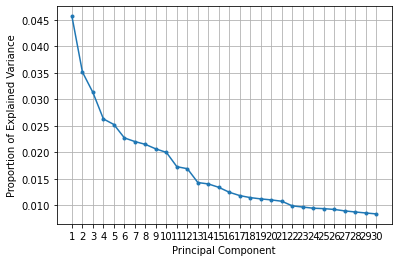

In [188]:
max = 30
pca.fit(X)
plt.plot(range(1, max+1), pca.explained_variance_ratio_[:max], marker = '.')
plt.xticks(ticks = range(1, max+1))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')
plt.grid()

The proportion of variance explained just keeps getting smaller but at around 20 components, the value already reached 0.01 which is already a good value. We can use 20 as the number of components to use in both test and train sets.

In [189]:
# Instantiate & fit data using PCA with n = 20
pca = PCA(n_components = 20)

# Fit and transform train set
pca.fit(X_train_sc)
X_train_pc = pca.transform(X_train_sc)

# Fit and transform test set
pca.fit(X_test_sc)
X_test_pc = pca.transform(X_test_sc)

# Deep Learning

In [191]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train_pc.shape[1]
input_shape

20

## First Sequential Model Iteration

In [204]:
# Instantiate Sequential model
model = Sequential()

# number of neurons for each layer
n1 = 14
n2 = 14
n3 = 8

# First hidden layer
model.add(Dense(n1, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(n2, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Third hidden layer
#model.add(Dense(n3, # How many neurons you have in your second hidden layer
#                activation = 'relu')) # What activation function are you using?



# Output layer
model.add(Dense(1, activation = 'sigmoid'))


# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])


# Step 3: Fit our model
history = model.fit(X_train_pc, y_train,
                    validation_data = (X_test_pc, y_test), 
                    epochs=30)





Epoch 1/30
299/299 [==============================] - 2s 5ms/step - loss: 0.4908 - acc: 0.8009 - val_loss: 0.6038 - val_acc: 0.7366
Epoch 2/30
299/299 [==============================] - 1s 4ms/step - loss: 0.4020 - acc: 0.8463 - val_loss: 0.6357 - val_acc: 0.7381
Epoch 3/30
299/299 [==============================] - 1s 5ms/step - loss: 0.3762 - acc: 0.8526 - val_loss: 0.6635 - val_acc: 0.7278
Epoch 4/30
299/299 [==============================] - 1s 5ms/step - loss: 0.3626 - acc: 0.8566 - val_loss: 0.6749 - val_acc: 0.7341
Epoch 5/30
299/299 [==============================] - 1s 4ms/step - loss: 0.3540 - acc: 0.8595 - val_loss: 0.6778 - val_acc: 0.7287
Epoch 6/30
299/299 [==============================] - 1s 5ms/step - loss: 0.3470 - acc: 0.8621 - val_loss: 0.6841 - val_acc: 0.7268
Epoch 7/30
299/299 [==============================] - 1s 4ms/step - loss: 0.3409 - acc: 0.8654 - val_loss: 0.6946 - val_acc: 0.7228
Epoch 8/30
299/299 [==============================] - 1s 4ms/step - loss: 0.

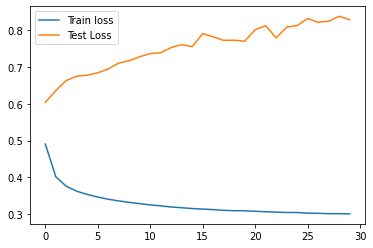

In [205]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

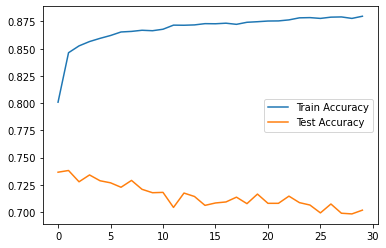

In [206]:

# Visualize the accuracy
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();

Using this model, there is a good performance, in terms of the loss and accuracy for the train set but has a severe case of overfitting. There is also overtraining which can mean that the network used is too complex.

## Second Sequential Model Iteration
Reduced number of neurons

In [222]:

# Instantiate Sequential model
model = Sequential()

# number of neurons for each layer
n1 = 3
n2 = 3
n3 = 8

# First hidden layer
model.add(Dense(n1, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
#model.add(Dense(n2, # How many neurons you have in your second hidden layer
#                activation = 'relu')) # What activation function are you using?
# Third hidden layer
#model.add(Dense(n3, # How many neurons you have in your second hidden layer
#                activation = 'relu')) # What activation function are you using?



# Output layer
model.add(Dense(1, activation = 'sigmoid'))


# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])


# Step 3: Fit our model
history = model.fit(X_train_pc, y_train,
                    validation_data = (X_test_pc, y_test), 
                    epochs=20)




Epoch 1/20
299/299 [==============================] - 3s 7ms/step - loss: 0.6522 - acc: 0.7115 - val_loss: 0.7214 - val_acc: 0.7039
Epoch 2/20
299/299 [==============================] - 3s 9ms/step - loss: 0.4704 - acc: 0.8081 - val_loss: 0.7217 - val_acc: 0.7262
Epoch 3/20
299/299 [==============================] - 3s 8ms/step - loss: 0.4250 - acc: 0.8342 - val_loss: 0.7355 - val_acc: 0.7237
Epoch 4/20
299/299 [==============================] - 2s 7ms/step - loss: 0.4030 - acc: 0.8448 - val_loss: 0.7483 - val_acc: 0.7237
Epoch 5/20
299/299 [==============================] - 2s 8ms/step - loss: 0.3902 - acc: 0.8494 - val_loss: 0.7468 - val_acc: 0.7240
Epoch 6/20
299/299 [==============================] - 2s 8ms/step - loss: 0.3820 - acc: 0.8531 - val_loss: 0.7628 - val_acc: 0.7281
Epoch 7/20
299/299 [==============================] - 3s 9ms/step - loss: 0.3760 - acc: 0.8534 - val_loss: 0.7698 - val_acc: 0.7256
Epoch 8/20
299/299 [==============================] - 3s 10ms/step - loss: 0

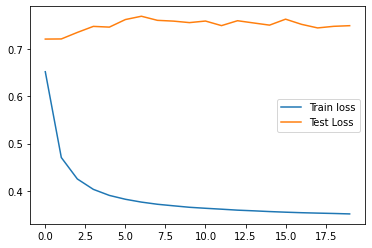

In [223]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

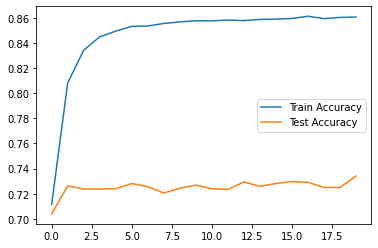

In [224]:
# Visualize the accuracy
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();

This has  lesser case of overfitting and overtraining but the test accuracy and loss is still bad.

## Third Sequential Model Iteration
Added regulizers

In [234]:
# Instantiate Sequential model
model = Sequential()

# number of neurons for each layer
n1 = 5
n2 = 3
n3 = 8

# First hidden layer
model.add(Dense(n1, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu',
                kernel_regularizer=tf.keras.regularizers.l1())) # What activation function are you using?
# Second hidden layer
model.add(Dense(n2, # How many neurons you have in your second hidden layer
                activation = 'relu',
                kernel_regularizer=tf.keras.regularizers.l1())) # What activation function are you using?
# Third hidden layer
#model.add(Dense(n3, # How many neurons you have in your second hidden layer
#                activation = 'relu')) # What activation function are you using?



# Output layer
model.add(Dense(1, activation = 'sigmoid'))


# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])


# Step 3: Fit our model
history = model.fit(X_train_pc, y_train,
                    validation_data = (X_test_pc, y_test), 
                    epochs=20)


Epoch 1/20
299/299 [==============================] - 6s 13ms/step - loss: 1.1564 - acc: 0.5609 - val_loss: 0.9324 - val_acc: 0.7077
Epoch 2/20
299/299 [==============================] - 3s 9ms/step - loss: 0.7777 - acc: 0.7607 - val_loss: 0.7899 - val_acc: 0.7520
Epoch 3/20
299/299 [==============================] - 3s 10ms/step - loss: 0.6589 - acc: 0.8133 - val_loss: 0.7344 - val_acc: 0.7441
Epoch 4/20
299/299 [==============================] - 3s 10ms/step - loss: 0.5672 - acc: 0.8500 - val_loss: 0.6994 - val_acc: 0.7403
Epoch 5/20
299/299 [==============================] - 3s 9ms/step - loss: 0.5092 - acc: 0.8507 - val_loss: 0.6755 - val_acc: 0.7403
Epoch 6/20
299/299 [==============================] - 3s 9ms/step - loss: 0.4738 - acc: 0.8521 - val_loss: 0.6681 - val_acc: 0.7407
Epoch 7/20
299/299 [==============================] - 3s 9ms/step - loss: 0.4502 - acc: 0.8533 - val_loss: 0.6628 - val_acc: 0.7432
Epoch 8/20
299/299 [==============================] - 2s 7ms/step - loss:

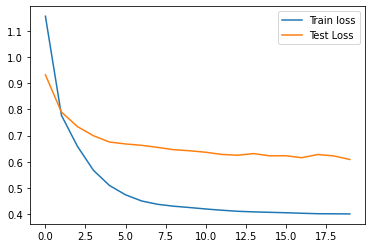

In [235]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

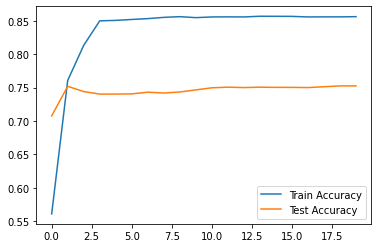

In [236]:
# Visualize the accuracy
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();

## Fourth Sequantial Model Iteration
Added Dropouts and Early Stopping

In [257]:


# Instantiate Sequential model
model = Sequential()

# number of neurons for each layer
n1 = 5
n2 = 3
n3 = 8

# First hidden layer
model.add(Dense(n1, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu',# What activation function are you using?
                kernel_regularizer=tf.keras.regularizers.l1())) 

model.add(Dropout(.2))

# Second hidden layer
model.add(Dense(n2, # How many neurons you have in your second hidden layer
                activation = 'relu', # What activation function are you using?
                kernel_regularizer=tf.keras.regularizers.l1()))

model.add(Dropout(.2))

# Third hidden layer
#model.add(Dense(n3, # How many neurons you have in your second hidden layer
#                activation = 'relu')) # What activation function are you using?



# Output layer
model.add(Dense(1, activation = 'sigmoid'))


# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])



# Step 3: Fit our model

# Early stopping
early_stopping = EarlyStopping(patience = 5)

history = model.fit(X_train_pc, y_train,
                    validation_data = (X_test_pc, y_test), 
                    epochs=20,
                    callbacks = [early_stopping])

Epoch 1/20
299/299 [==============================] - 4s 8ms/step - loss: 0.9989 - acc: 0.6616 - val_loss: 0.8326 - val_acc: 0.7127
Epoch 2/20
299/299 [==============================] - 2s 7ms/step - loss: 0.7227 - acc: 0.7696 - val_loss: 0.7116 - val_acc: 0.7447
Epoch 3/20
299/299 [==============================] - 2s 8ms/step - loss: 0.6066 - acc: 0.7992 - val_loss: 0.6635 - val_acc: 0.7551
Epoch 4/20
299/299 [==============================] - 3s 8ms/step - loss: 0.5484 - acc: 0.8108 - val_loss: 0.6426 - val_acc: 0.7504
Epoch 5/20
299/299 [==============================] - 3s 9ms/step - loss: 0.5166 - acc: 0.8151 - val_loss: 0.6362 - val_acc: 0.7451
Epoch 6/20
299/299 [==============================] - 3s 9ms/step - loss: 0.5019 - acc: 0.8170 - val_loss: 0.6255 - val_acc: 0.7488
Epoch 7/20
299/299 [==============================] - 3s 9ms/step - loss: 0.4997 - acc: 0.8113 - val_loss: 0.6225 - val_acc: 0.7457
Epoch 8/20
299/299 [==============================] - 2s 8ms/step - loss: 0.

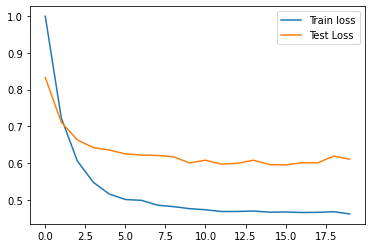

In [258]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

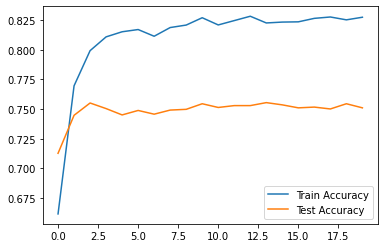

In [259]:
# Visualize the accuracy
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();

From the plots of the accuracies and loss values, the last sequential model is the best among the models since it has a low value for the loss and high value for the accuracy, for both the training and test sets. Moreover, teh values for the train and test doesn't differ by a large value which means that the model doesn't overfit (not that much).

# Final Model Evaluation

In [262]:
# Create predictions based on the final model
y_pred = model.predict(X_test_pc)

In [273]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

y_pred_class = y_pred > 0.5
cm = confusion_matrix(y_test, y_pred_class)
tn, fp, fn, tp = cm.ravel()

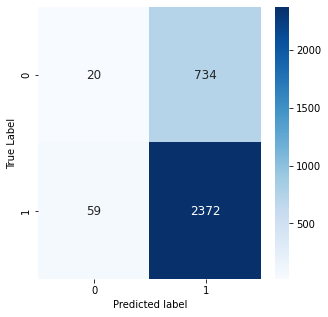

In [295]:
# Display the confusion Matrix
cm_df = pd.DataFrame(cm, range(2),range(2))
plt.figure(figsize = (5,5))

sns.heatmap(cm_df, annot=True, annot_kws={"size": 12}, fmt='g', cmap = 'Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()


In [281]:
# Calculate the test accuracy
accuracy = (tp + tn)/ len(y_pred)
print(f'Test Accuracy = {accuracy:.3f}')

Test Accuracy = 0.751


In [284]:
# calculate the False negative rate 
fnr = fn / (fn + tp)
print(f'False Negative Rate = {fnr:.3f}')

False Negative Rate = 0.024


In [286]:
# calculate the False positive rate 
fpr = fp / (fp + tn)
print(f'False Positive Rate = {fpr:.3f}')

False Positive Rate = 0.973


This model has a decent accuracy score of around 75% but this mainly comes from its low False Negativity Rate. However, the model has high False Negativity Rate, which could also come from the dataset being highly inbalanced. This means that the model is good at correctly predicting which students will actually pass but bad at predicting which students will actually fail. With this accuracy score, it is already good at solving the problem of determining which students will pass or fail. However, if the school's plan is to predict which ones will fail, maybe to do some intervention before they actually fail, this model will have a bad performance. 

In [294]:
y_test.value_counts()

1    2431
0     754
Name: passed_course, dtype: int64